In [122]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import decomposition
from sklearn import datasets

from sklearn import manifold, datasets
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [16]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * np.random.uniform(size=X.shape)
linearly_separable = (X, y)

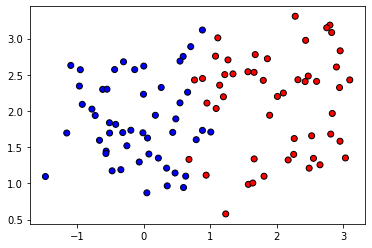

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

In [19]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

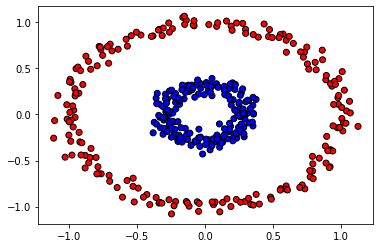

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

In [48]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

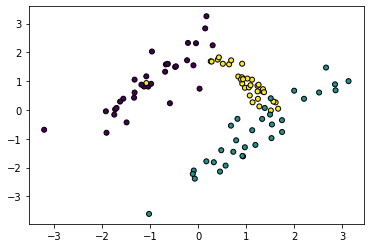

In [49]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [51]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

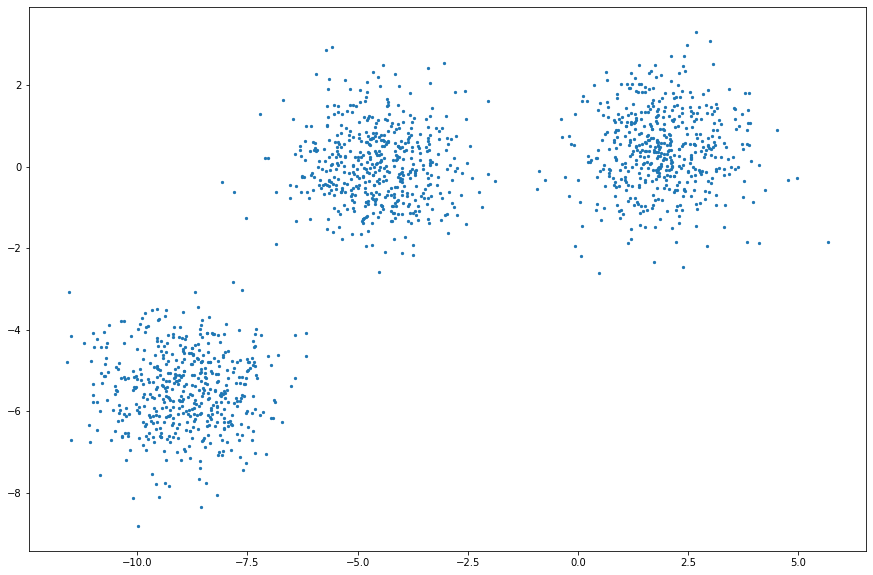

In [64]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], s=5)

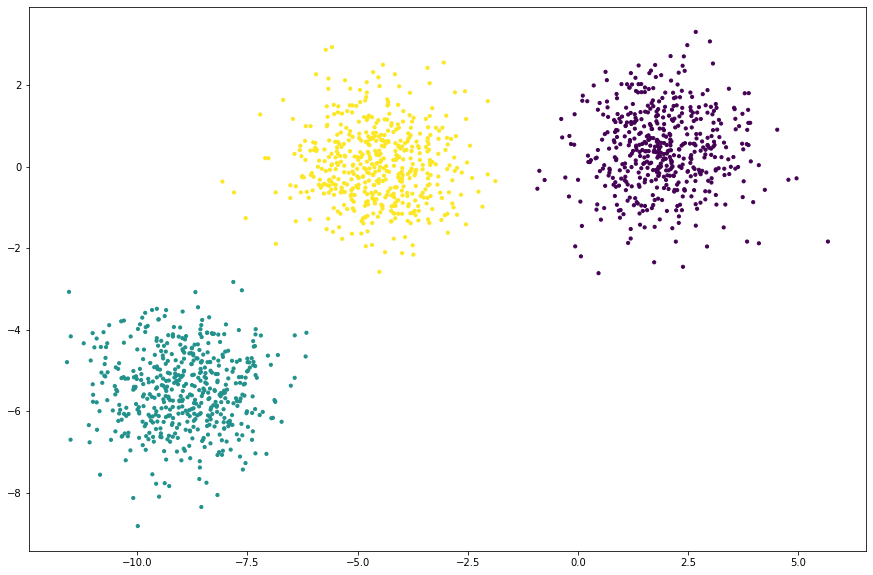

In [69]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10)


In [55]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

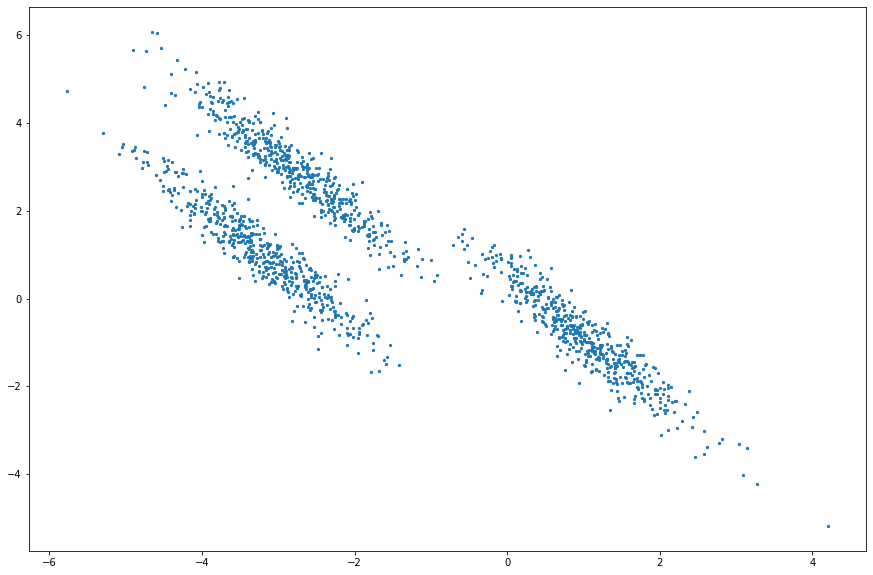

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=5, )

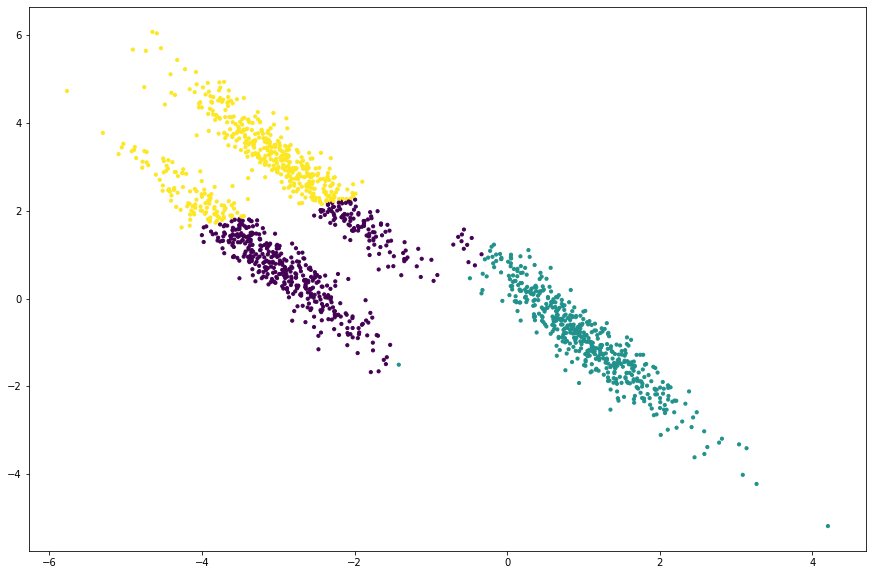

In [70]:
y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)

plt.figure(figsize=(15,10))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, s=10)


In [72]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [73]:
db.labels_

array([ 0,  0, -1, ...,  1, -1,  1], dtype=int64)

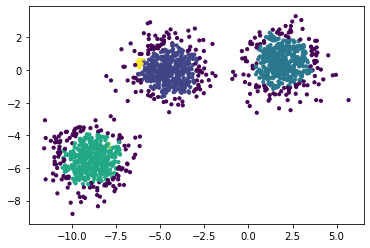

In [75]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=db.labels_)

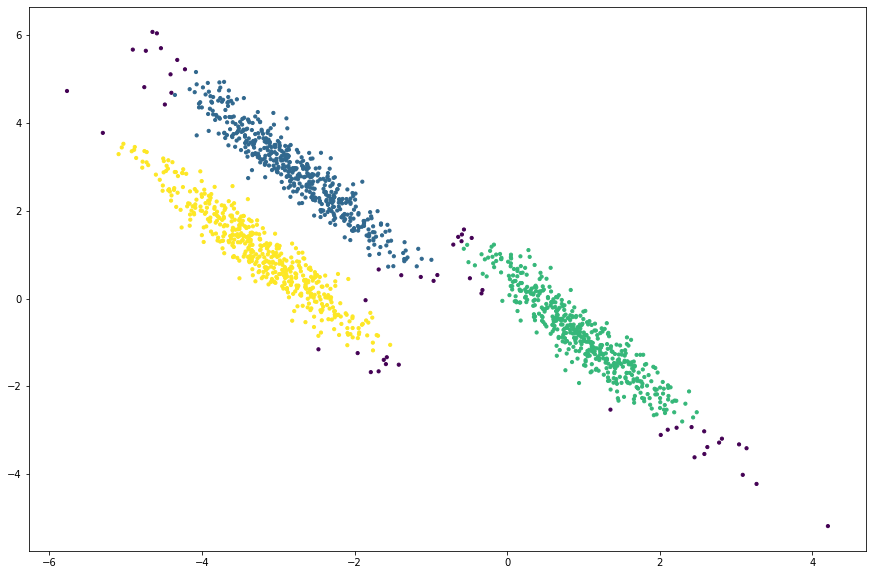

In [77]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_aniso)
plt.figure(figsize=(15,10))

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=10, c=db.labels_)

In [81]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
blobs_params = dict( n_samples=n_inliers, n_features=2)

In [99]:
X = np.vstack([make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.1,
               **blobs_params)[0], np.random.uniform(-1, 1, size=(100, 2))])

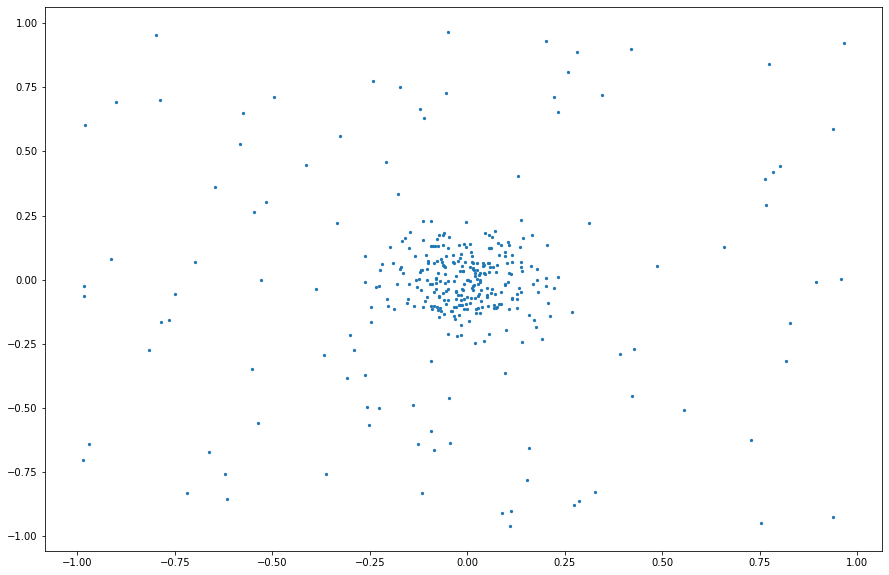

In [100]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], s=5, )

In [114]:
X, y=datasets.load_digits(return_X_y=True)

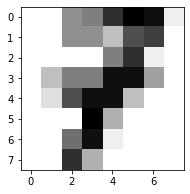

In [133]:
plt.figure(1, figsize=(3, 3))
plt.imshow(X[7].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')


In [117]:
pca = decomposition.PCA(n_components=2)

In [118]:
Xt = pca.fit_transform(X)

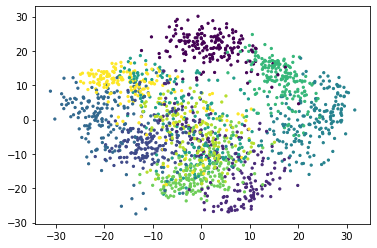

In [121]:
plt.scatter(Xt[:, 0], Xt[:, 1], s=5, c=y)

In [124]:
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=0, perplexity=5)
Y = tsne.fit_transform(X)

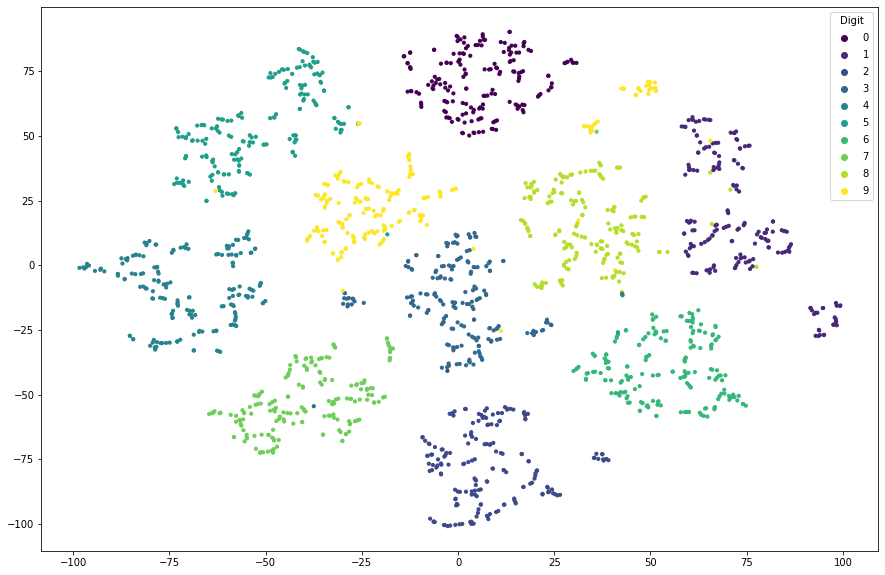

In [146]:
plt.figure(figsize=(15,10))
lines = plt.scatter(Y[:, 0], Y[:, 1], c=y, s=10)
plt.legend(*lines.legend_elements(),
                    loc="upper right", title="Digit")